In [128]:
import numpy as np
import pandas as pd
from scipy.stats import hypergeom
import os

In [74]:
np.random.seed(1234)

level_tier_prob = {1:{1:1, 2:0, 3:0, 4:0, 5:0},
                   2:{1:1, 2:0, 3:0, 4:0, 5:0},
                   3:{1:0.75, 2:0.25, 3:0, 4:0, 5:0},
                   4:{1:0.55, 2:0.3, 3:0.15, 4:0, 5:0},
                   5:{1:0.45, 2:0.33, 3:0.2, 4:0.02, 5:0},
                   6:{1:0.25, 2:0.4, 3:0.3, 4:0.05, 5:0},
                   7:{1:0.19, 2:0.3, 3:0.35, 4:0.15, 5:0.01},
                   8:{1:0.16, 2:0.2, 3:0.35, 4:0.25, 5:0.04},
                   9:{1:0.09, 2:0.15, 3:0.3, 4:0.3, 5:0.16},
                   10:{1:0.05, 2:0.1, 3:0.2, 4:0.4, 5:0.25}}

units_per_tier =  {1:29,
                   2:22,
                   3:18,
                   4:12,
                   5:10}

champion_tier_cost = pd.read_csv(os.getcwd() + '\\champion_tier_cost.csv')

In [75]:
class Player:
    def __init__(self, econ, health, level):
        self.econ = econ
        self.health = health
        self.level = level
    
    def update_econ():
        pass
        
    def update_health():
        pass
    
    def update_level():
        pass
    
class Champion:
    def __init__(self, name, tier, cost):
        self.name = name
        self.tier = tier
        self.cost = cost
        self.pool = units_per_tier[self.tier]
    
    def buy(self):
        if self.pool == 0:
            print("None left in pool")
        else:
            self.pool -= 1
            print("There are " + str(self.pool) + " " + self.name + " units left")
    
    def sell(self):
        if self.pool < units_per_tier[self.tier]:
            self.pool += 1
            print("There are " + str(self.pool) + " " + self.name + " units left")
        else:
            print("Cannot sell unit since you do not have it")

In [76]:
champions_lst = {row[0]: Champion(row[0], row[1], row[2]) for row in zip(champion_tier_cost['champion'], champion_tier_cost['tier'], champion_tier_cost['cost'])}

In [178]:
def probability_hit_champion(player, champion, champions_lst, num_to_hit):
    same_tier_df = champion_tier_cost[champion_tier_cost['tier'] == champion.tier]
    #Multiply number of rolls by 5 since we have 5 champions per roll
    num_of_rolls = ((player.econ - champion.cost * num_to_hit) // 2)
    print('Number of Rolls Avaliable: ' + str(num_of_rolls))
    if num_of_rolls <= 0:
        return 0
    total = sum([champions[champion].pool for champion in same_tier_df['champion']])
    
    #Hypergeometric Distribution
    num_of_events = num_of_rolls * 5
    prob_of_hit = 1 - hypergeom.cdf(num_to_hit - 1,total, champion.pool, num_of_events)
    return level_tier_prob[player.level][champion.tier] * prob_of_hit 
        
    

In [179]:
player = Player(50, 100, 3)

In [180]:
probability_hit_champion(player, champions_lst['aatrox'], champions_lst, 1)

Number of Rolls Avaliable: 24


0.7499934502476013

(array([1.3000e+01, 1.6500e+02, 1.6060e+03, 7.7550e+03, 2.0968e+04,
        3.1514e+04, 2.5601e+04, 1.0418e+04, 1.8770e+03, 8.3000e+01]),
 array([110. , 111.9, 113.8, 115.7, 117.6, 119.5, 121.4, 123.3, 125.2,
        127.1, 129. ]),
 <BarContainer object of 10 artists>)

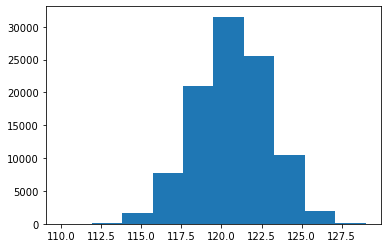